In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
FOLDER_PATH = '/content/drive/My Drive/yolo/keras-yolo3-blood-cell'
import sys
sys.path.append(FOLDER_PATH)

In [ ]:
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from train import yolo_body, get_anchors, create_model, get_classes
from yolo import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob
import os

Using TensorFlow backend.


In [ ]:
FOLDER_PATH = '/content/drive/My Drive/yolo'

In [ ]:
classes_path = os.path.join(FOLDER_PATH, '第一次影像蒐集/海廢lable/class/predefined_classes.txt')
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = os.path.join(FOLDER_PATH, 'keras-yolo3-blood-cell/model_data/yolo_anchors.txt')
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path=os.path.join(FOLDER_PATH, 'train_epoch_record/ep069-loss48.963-val_loss22.713.h5'),
            classes_path=classes_path,
            anchors_path=anchors_path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
/content/drive/My Drive/yolo/train_epoch_record/ep069-loss48.963-val_loss22.713.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/content/drive/My Drive/yolo/第一次影像蒐集/海廢lable/image/AIA_00587.jpg
(700, 700) (416, 416)
(416, 416, 3)
Found 5 boxes for img
02_plastic_bottle_cap 0.25 (209, 508) (227, 536)
02_plastic_bottle_cap 0.35 (258, 481) (276, 502)
02_plastic_bottle_cap 0.36 (251, 0) (265, 11)
02_plastic_bottle_cap 0.56 (538, 16) (553, 30)
02_plastic_bottle_cap 0.81 (560, 278) (575, 297)
8.257355356999994


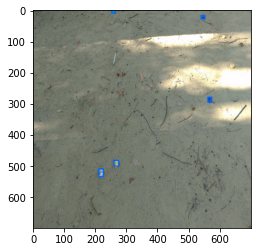

In [ ]:
path = np.random.choice(glob(os.path.join(FOLDER_PATH, '第一次影像蒐集/海廢lable/image/*')), 1)[0]
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.imshow(r_image)

In [ ]:
# COCO pre-trained
classes_path = os.path.join(FOLDER_PATH, 'model_data/coco_classes.txt')
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = os.path.join(FOLDER_PATH, 'model_data/yolo_anchors.txt')
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path=os.path.join(FOLDER_PATH, 'yolo_weights.h5'),
            classes_path=classes_path,
            anchors_path=anchors_path)

/content/drive/My Drive/yolo/keras-yolo3-blood-cell/yolo_weights.h5 model, anchors, and classes loaded.


/content/drive/My Drive/yolo/keras-yolo3-blood-cell/street.jpeg
(273, 185) (416, 416)
(416, 416, 3)
Found 11 boxes for img
car 0.21 (5, 101) (34, 111)
car 0.40 (75, 98) (88, 105)
car 0.50 (55, 98) (77, 106)
person 0.84 (157, 89) (175, 153)
person 0.95 (92, 124) (100, 152)
person 0.95 (83, 128) (91, 156)
person 0.98 (196, 110) (215, 172)
person 0.98 (174, 100) (201, 174)
person 0.98 (146, 106) (165, 169)
person 0.99 (115, 98) (139, 166)
person 0.99 (218, 112) (239, 171)
2.343697247000023


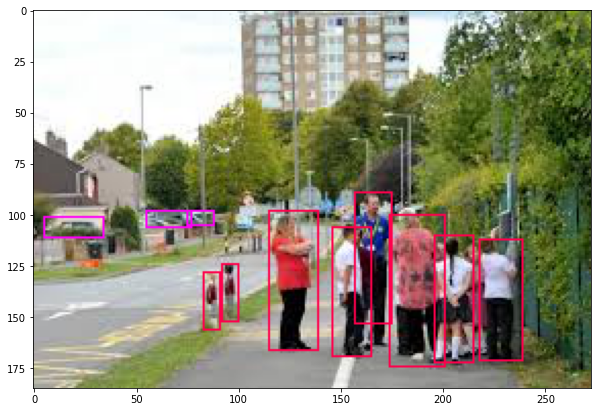

In [ ]:
path = os.path.join(FOLDER_PATH, 'bear.jpeg')
path = os.path.join(FOLDER_PATH, 'street.jpeg')
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.figure(figsize=(10,10))
plt.imshow(r_image)